In [1]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 421.8MB 43kB/s 
     |████████████████████████████████| 3.8MB 42.2MB/s 
     |████████████████████████████████| 450kB 51.7MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [2]:
!pip show tensorflow

Name: tensorflow
Version: 2.1.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-preprocessing, opt-einsum, wheel, numpy, scipy, astor, six, wrapt, tensorflow-estimator, termcolor, google-pasta, gast, protobuf, grpcio, tensorboard, keras-applications, absl-py
Required-by: stable-baselines, magenta, fancyimpute


In [0]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [0]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [0]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [0]:
import zipfile
with zipfile.ZipFile("/content/drive/My Drive/MSDS422/test.zip","r") as zip_ref:
    zip_ref.extractall("dogcat_test")

In [0]:
with zipfile.ZipFile("/content/drive/My Drive/MSDS422/train.zip","r") as zip_ref:
    zip_ref.extractall("dogcat_train")

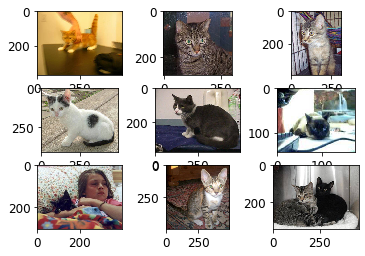

In [8]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/dogcat_train/train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

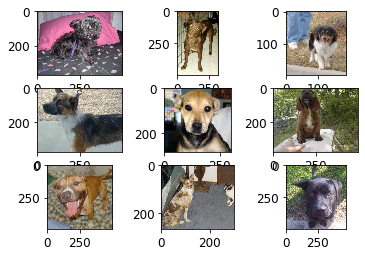

In [9]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/dogcat_train/train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [0]:
import os
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'val/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		os.makedirs(newdir, exist_ok=True)

In [0]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'val/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'dogcat_train/train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'val/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

In [12]:
import fnmatch
import os
for file in os.listdir('/content/dataset_dogs_vs_cats/train/dogs'):
    if fnmatch.fnmatch(file, '*.jpg'):
        print(file)

Streaming output truncated to the last 5000 lines.
dog.14.jpg
dog.11207.jpg
dog.9894.jpg
dog.2480.jpg
dog.8447.jpg
dog.10564.jpg
dog.2104.jpg
dog.2783.jpg
dog.4390.jpg
dog.735.jpg
dog.12239.jpg
dog.5542.jpg
dog.7954.jpg
dog.11839.jpg
dog.3890.jpg
dog.2905.jpg
dog.6154.jpg
dog.4982.jpg
dog.295.jpg
dog.4544.jpg
dog.5602.jpg
dog.12382.jpg
dog.464.jpg
dog.11055.jpg
dog.4169.jpg
dog.8197.jpg
dog.1851.jpg
dog.5382.jpg
dog.4970.jpg
dog.5991.jpg
dog.5521.jpg
dog.5246.jpg
dog.1038.jpg
dog.1906.jpg
dog.5907.jpg
dog.4926.jpg
dog.4134.jpg
dog.6802.jpg
dog.2086.jpg
dog.317.jpg
dog.7511.jpg
dog.3738.jpg
dog.3508.jpg
dog.300.jpg
dog.4007.jpg
dog.2200.jpg
dog.4906.jpg
dog.4561.jpg
dog.2376.jpg
dog.485.jpg
dog.9986.jpg
dog.10063.jpg
dog.667.jpg
dog.11983.jpg
dog.11130.jpg
dog.1510.jpg
dog.5093.jpg
dog.3167.jpg
dog.1419.jpg
dog.2982.jpg
dog.1907.jpg
dog.2495.jpg
dog.10993.jpg
dog.3654.jpg
dog.345.jpg
dog.3462.jpg
dog.804.jpg
dog.8407.jpg
dog.2576.jpg
dog.4900.jpg
dog.3461.jpg
dog.11320.jpg
dog.5350.jpg


In [0]:
from google.colab import files

In [0]:
from tensorflow.keras import layers

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [0]:
from tensorflow.keras import Sequential

In [18]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [20]:
# prepare iterators
train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
	class_mode='binary', batch_size=64, target_size=(200, 200))
val_it = datagen.flow_from_directory('dataset_dogs_vs_cats/val/',
	class_mode='binary', batch_size=64, target_size=(200, 200))

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


In [29]:
test_it = datagen.flow_from_directory('dogcat_test',
	class_mode='binary', batch_size=64, target_size=(200, 200))

Found 12500 images belonging to 1 classes.


MODEL #1

In [0]:
# define cnn model
def define_model_1():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [0]:
model=define_model_1()

In [24]:
%time history = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=val_it, validation_steps=len(val_it), epochs=20, verbose=0)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
CPU times: user 27min 49s, sys: 1min 51s, total: 29min 41s
Wall time: 24min 58s


In [25]:
_, acc = model.evaluate(val_it, steps=len(val_it), verbose=0)
print('> %.3f' % (acc * 100.0))

  ...
    to  
  ['...']
> 73.568


In [26]:
_, acc = model.evaluate(train_it, steps=len(train_it), verbose=0)
print('> %.3f' % (acc * 100.0))

  ...
    to  
  ['...']
> 95.245


In [27]:
history.params

{'batch_size': None,
 'do_validation': True,
 'epochs': 20,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 293,
 'steps': 293,
 'verbose': 0}

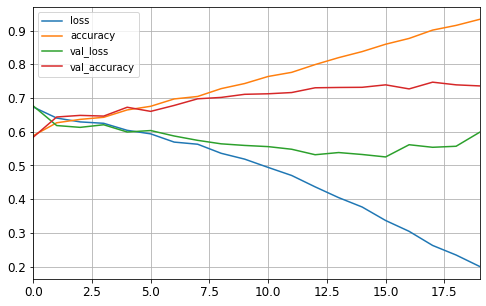

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [0]:
pred1=model.predict(test_it)

In [31]:
pred1

array([[0.9995152 ],
       [0.29656532],
       [0.0281448 ],
       ...,
       [0.0909702 ],
       [0.14567165],
       [0.00179055]], dtype=float32)

In [0]:
pred1_new=np.asarray(pred1)

In [0]:
np.savetxt('cnn_pred1.csv', pred1_new, delimiter=',')
files.download('cnn_pred1.csv')

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               40960128  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
_________________________________________________________________


Kaggle Score: 1.55489

Model #2

In [0]:
# define cnn model
def define_model_2():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='sigmoid'))
	# compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [0]:
model=define_model_2()

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               9834624   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [57]:
%time history = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=val_it, validation_steps=len(val_it), epochs=20)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 293 steps, validate for 99 steps
Epoch 1/20
293/293 [==============================] - 76s 260ms/step - loss: 0.5221 - accuracy: 0.7399 - val_loss: 0.5411 - val_accuracy: 0.7306
Epoch 2/20
293/293 [==============================] - 76s 259ms/step - loss: 0.4991 - accuracy: 0.7556 - val_loss: 0.5140 - val_accuracy: 0.7422
Epoch 3/20
293/293 [==============================] - 76s 260ms/step - loss: 0.4718 - accuracy: 0.7742 - val_loss: 0.5112 - val_accuracy: 0.7425
Epoch 4/20
293/293 [==============================] - 77s 263ms/step - loss: 0.4470 - accuracy: 0.7905 - val_loss: 0.5241 - val_accuracy: 0.7427
Epoch 5/20
293/293 [==============================] - 77s 263ms/step - loss: 0.4126 - accuracy: 0.8122 - val_loss: 0.4989 - val_accuracy: 0.7538
Epoch 6/20
293/293 [==============================] - 76s 260ms/step - loss: 0.3829 - accuracy: 0.8314 - val_loss: 0.5318 - val_accuracy: 0.7314
Epoch 7/20
293/293 [=================

In [61]:
history.params

{'batch_size': None,
 'do_validation': True,
 'epochs': 20,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 293,
 'steps': 293,
 'verbose': 0}

In [62]:
_, acc = model.evaluate(val_it, steps=len(val_it), verbose=0)
print('> %.3f' % (acc * 100.0))

  ...
    to  
  ['...']
> 75.932


In [63]:
_, acc = model.evaluate(train_it, steps=len(train_it), verbose=0)
print('> %.3f' % (acc * 100.0))

  ...
    to  
  ['...']
> 99.979


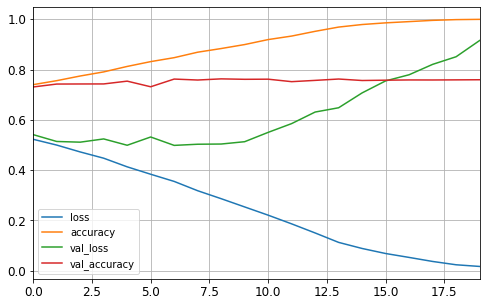

In [64]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [0]:
pred2=model.predict(test_it)

In [66]:
pred2

array([[9.9999988e-01],
       [1.0696346e-02],
       [1.0097052e-03],
       ...,
       [2.7364658e-03],
       [8.5785377e-01],
       [9.7413686e-09]], dtype=float32)

In [0]:
pred2_new=np.asarray(pred2)

In [0]:
np.savetxt('cnn_pred2.csv', pred2_new, delimiter=',')
files.download('cnn_pred2.csv')

Kaggle score: 3.23473


Model #3

In [0]:
# define cnn model
def define_model_3():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='valid', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [0]:
model=define_model_3()

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 313632)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               40145024  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 40,146,049
Trainable params: 40,146,049
Non-trainable params: 0
_________________________________________________________________


In [72]:
%time history = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=val_it, validation_steps=len(val_it), epochs=20)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 293 steps, validate for 99 steps
Epoch 1/20
293/293 [==============================] - 73s 251ms/step - loss: 0.6659 - accuracy: 0.5956 - val_loss: 0.6300 - val_accuracy: 0.6422
Epoch 2/20
293/293 [==============================] - 73s 249ms/step - loss: 0.6258 - accuracy: 0.6448 - val_loss: 0.6071 - val_accuracy: 0.6564
Epoch 3/20
293/293 [==============================] - 73s 249ms/step - loss: 0.5997 - accuracy: 0.6721 - val_loss: 0.6251 - val_accuracy: 0.6470
Epoch 4/20
293/293 [==============================] - 73s 248ms/step - loss: 0.5824 - accuracy: 0.6882 - val_loss: 0.5846 - val_accuracy: 0.6808
Epoch 5/20
293/293 [==============================] - 73s 248ms/step - loss: 0.5487 - accuracy: 0.7205 - val_loss: 0.5667 - val_accuracy: 0.7013
Epoch 6/20
293/293 [==============================] - 73s 248ms/step - loss: 0.5228 - accuracy: 0.7420 - val_loss: 0.5727 - val_accuracy: 0.6932
Epoch 7/20
293/293 [=================

In [73]:
history.params

{'batch_size': None,
 'do_validation': True,
 'epochs': 20,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 293,
 'steps': 293,
 'verbose': 0}

In [74]:
_, acc = model.evaluate(val_it, steps=len(val_it), verbose=0)
print('> %.3f' % (acc * 100.0))

  ...
    to  
  ['...']
> 73.156


In [75]:
_, acc = model.evaluate(train_it, steps=len(train_it), verbose=0)
print('> %.3f' % (acc * 100.0))

  ...
    to  
  ['...']
> 99.283


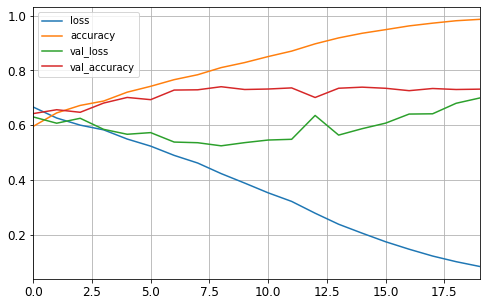

In [76]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [0]:
pred3=model.predict(test_it)

In [0]:
pred3_new=np.asarray(pred3)

In [0]:
np.savetxt('cnn_pred3.csv', pred3_new, delimiter=',')
files.download('cnn_pred3.csv')

Kaggle Score: 1.84600

Model #4

In [0]:
# define cnn model
def define_model_4():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3,3), activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='sigmoid'))
	# compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [0]:
model=define_model_4()

In [84]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 98, 98, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 67712)            

In [85]:
%time history = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=val_it, validation_steps=len(val_it), epochs=20)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 293 steps, validate for 99 steps
Epoch 1/20
293/293 [==============================] - 77s 263ms/step - loss: 0.6714 - accuracy: 0.5781 - val_loss: 0.6362 - val_accuracy: 0.6375
Epoch 2/20
293/293 [==============================] - 77s 261ms/step - loss: 0.6295 - accuracy: 0.6400 - val_loss: 0.6075 - val_accuracy: 0.6663
Epoch 3/20
293/293 [==============================] - 76s 258ms/step - loss: 0.5936 - accuracy: 0.6806 - val_loss: 0.5639 - val_accuracy: 0.7073
Epoch 4/20
293/293 [==============================] - 77s 263ms/step - loss: 0.5597 - accuracy: 0.7149 - val_loss: 0.5420 - val_accuracy: 0.7298
Epoch 5/20
293/293 [==============================] - 77s 263ms/step - loss: 0.5376 - accuracy: 0.7299 - val_loss: 0.5244 - val_accuracy: 0.7365
Epoch 6/20
293/293 [==============================] - 78s 265ms/step - loss: 0.5144 - accuracy: 0.7446 - val_loss: 0.5042 - val_accuracy: 0.7508
Epoch 7/20
293/293 [=================

In [86]:
history.params

{'batch_size': None,
 'do_validation': True,
 'epochs': 20,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 293,
 'steps': 293,
 'verbose': 0}

In [87]:
_, acc = model.evaluate(val_it, steps=len(val_it), verbose=0)
print('> %.3f' % (acc * 100.0))

  ...
    to  
  ['...']
> 79.819


In [88]:
_, acc = model.evaluate(train_it, steps=len(train_it), verbose=0)
print('> %.3f' % (acc * 100.0))

  ...
    to  
  ['...']
> 95.844


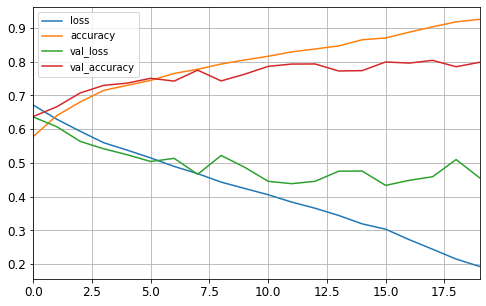

In [89]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [0]:
pred4=model.predict(test_it)

In [0]:
pred4_new=np.asarray(pred4)

In [0]:
np.savetxt('cnn_pred4.csv', pred4_new, delimiter=',')
files.download('cnn_pred4.csv')

Kaggle score: 1.61721